In [ ]:
import numpy as np

def jacobi(A, b, x0, tol=1e-8, max_iterations=1000):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).copy()
    
    n = len(b)
    
    for k in range(max_iterations):
        x_new = np.zeros_like(x)

        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]

        # Check for convergence (infinity norm)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1  # iterations used

        x = x_new

    return x, max_iterations

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, x0, tol=1e-8, max_iterations=1000):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).copy()
    
    n = len(b)
    
    for k in range(max_iterations):
        x_new = x.copy()

        for i in range(n):
            s1 = sum(A[i, j] * x_new[j] for j in range(i))       # updated values
            s2 = sum(A[i, j] * x[j] for j in range(i + 1, n))    # old values
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1

        x = x_new

    return x, max_iterations


Tolerance = 0.001
Jacobi iterations: 4
Gauss-Seidel iterations: 4


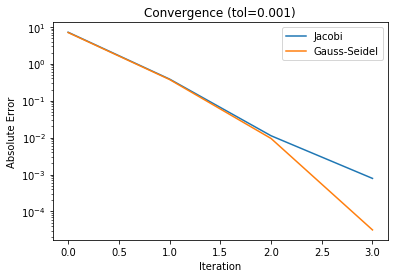


Tolerance = 1e-06
Jacobi iterations: 7
Gauss-Seidel iterations: 5


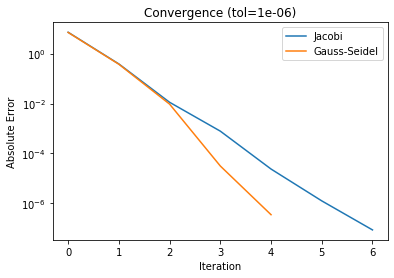


Tolerance = 1e-09
Jacobi iterations: 9
Gauss-Seidel iterations: 7


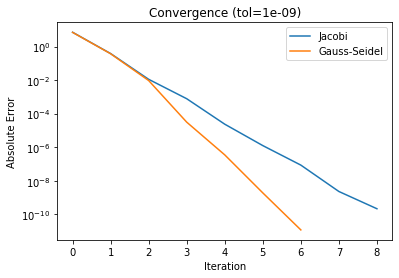

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([
    [3, -0.1, -0.2],
    [0.1, 7, -0.3],
    [0.3, -0.2, 10]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)

x0 = np.zeros(3)


def jacobi(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    errors = []

    for k in range(max_iter):
        x_new = np.zeros_like(x)

        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += A[i][j] * x[j]

            x_new[i] = (b[i] - s) / A[i][i]

        error = np.linalg.norm(x_new - x, np.inf)
        errors.append(error)

        if error < tol:
            return x_new, k+1, errors

        x = x_new

    return x, max_iter, errors


def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    errors = []

    for k in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += A[i][j] * x[j]

            x[i] = (b[i] - s) / A[i][i]

        error = np.linalg.norm(x - x_old, np.inf)
        errors.append(error)

        if error < tol:
            return x, k+1, errors

    return x, max_iter, errors


tolerances = [1e-3, 1e-6, 1e-9]

for tol in tolerances:
    print("\nTolerance =", tol)

    x_j, it_j, err_j = jacobi(A, b, x0, tol, 10000)
    x_gs, it_gs, err_gs = gauss_seidel(A, b, x0, tol, 10000)

    print("Jacobi iterations:", it_j)
    print("Gauss-Seidel iterations:", it_gs)

    plt.figure()
    plt.plot(err_j, label="Jacobi")
    plt.plot(err_gs, label="Gauss-Seidel")
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Absolute Error")
    plt.title("Convergence (tol=" + str(tol) + ")")
    plt.legend()
    plt.show()

In [ ]:
#As the tolerance becomes smaller, the number of iteratarions required increases
#for both methods.

In [ ]:
# AI Assistance Acknowledgment:
# I used ChatGPT to help clarify the structure of the Jacobi and
# Gauss-Seidel iteration loops and how to organize the convergence check.
#
# Prompt Used:
# "How should I structure Jacobi and Gauss-Seidel methods in Python
# with a tolerance condition and error tracking for plotting?"
#
# Used ChatGPT